# Amazon Software Dataset

# Downloading and converting .json to .csv

`Downloading dataset`

In [6]:
import requests

url = "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Software.jsonl.gz"
save_path = 'Unknown.jsonl.gz'  # Specify the filename and extension based on your dataset

response = requests.get(url)
if response.status_code == 200:
    with open(save_path, 'wb') as file:
        file.write(response.content)
    print(f"Dataset downloaded successfully to {save_path}")
else:
    print(f"Failed to download dataset, status code {response.status_code}")

Dataset downloaded successfully to Unknown.jsonl.gz


`Downloading Metadata`

In [2]:
url = "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/meta_categories/meta_Software.jsonl.gz"
save_path = 'metadata.jsonl.gz'  # Specify the filename and extension based on your dataset

response = requests.get(url)
if response.status_code == 200:
    with open(save_path, 'wb') as file:
        file.write(response.content)
    print(f"Dataset downloaded successfully to {save_path}")
else:
    print(f"Failed to download dataset, status code {response.status_code}")

Dataset downloaded successfully to metadata.jsonl.gz


In [3]:
import pandas as pd

# Initialize an empty list to collect chunks
chunks = []

# Read the JSON file in chunks
chunk_size = 10000  # Adjust the chunk size as needed
for chunk in pd.read_json('/content/Unknown.jsonl.gz', lines=True, chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
dataset = pd.concat(chunks, ignore_index=True)

# Write to CSV
dataset.to_csv('dataset.csv', index=False, escapechar='\\')


In [4]:
# Initialize an empty list to collect chunks
chunks = []

# Read the JSON file in chunks
chunk_size = 10000  # Adjust the chunk size as needed
for chunk in pd.read_json('/content/metadata.jsonl.gz', lines=True, chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
dataset = pd.concat(chunks, ignore_index=True)

# Write to CSV with escapechar
dataset.to_csv('meta_data.csv', index=False, escapechar='\\')


# Data Loading

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('dataset.csv')
meta_df = pd.read_csv('meta_data.csv')

In [7]:
print('Dataset sizes:')
print('Dataset:', df.shape)
print('Metadata:', meta_df.shape)

Dataset sizes:
Dataset: (4880181, 10)
Metadata: (89251, 16)


In [8]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1,malware,mcaffee IS malware,[],B07BFS3G7P,B0BQSK9QCF,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2019-07-03 19:37:12.076,0,False
1,5,Lots of Fun,I love playing tapped out because it is fun to...,[],B00CTQ6SIG,B00CTQ6SIG,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2015-02-16 20:58:56.000,0,True
2,5,Light Up The Dark,I love this flashlight app! It really illumin...,[],B0066WJLU6,B0066WJLU6,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2013-03-04 12:14:27.000,0,True
3,4,Fun game,One of my favorite games,[],B00KCYMAWK,B00KCYMAWK,AH6CATODIVPVUOJEWHRSRCSKAOHA,2019-06-20 20:10:28.662,0,True
4,4,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,[],B00P1RK566,B00P1RK566,AEINY4XOINMMJCK5GZ3M6MMHBN6A,2014-12-11 00:19:56.000,0,True


Data Dictionary

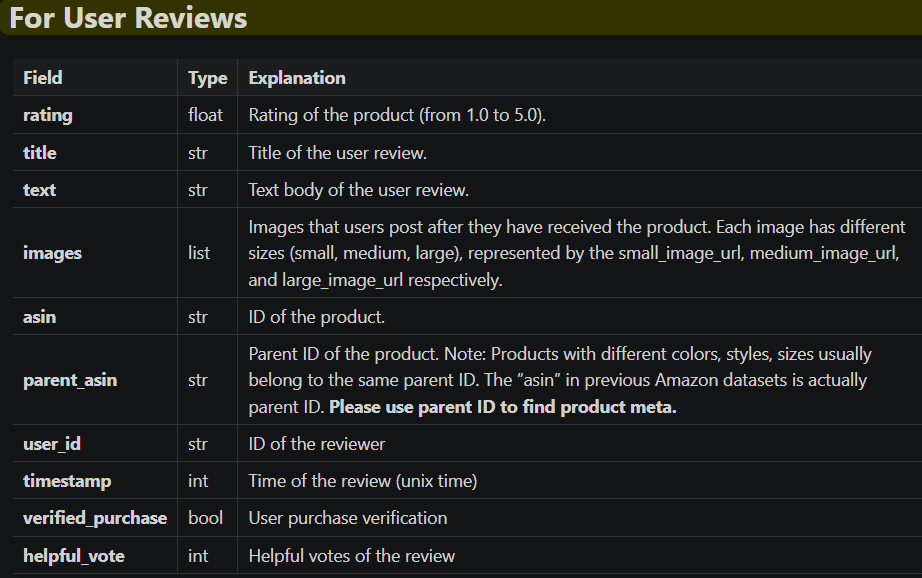

In [9]:
meta_df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Appstore for Android,Accupressure Guide,3.6,NaN,['All the pressing point has been explained wi...,"[""Acupressure technique is very ancient and ve...",0.00,[{'large': 'https://m.media-amazon.com/images/...,"[{'title': '', 'url': '', 'user_id': ''}]",mAppsguru,[],"{'Release Date': '2015', 'Date first listed on...",B00VRPSGEO,NaN,NaN,NaN
1,Appstore for Android,Ankylosaurus Fights Back - Smithsonian's Prehi...,4.0,NaN,['ENCOURAGE literacy skills with highlighted n...,"[""Join Ankylosaurus in this interactive book a...",2.99,[{'large': 'https://m.media-amazon.com/images/...,"[{'title': '', 'url': '', 'user_id': ''}]","Oceanhouse Media, Inc",[],"{'Release Date': '2014', 'Date first listed on...",B00NWQXXHQ,NaN,NaN,NaN
2,Appstore for Android,Mahjong 2015,3.1,NaN,['Mahjong 2015 is a free solitaire matching ga...,['Mahjong 2015 is a free solitaire matching ga...,0.00,[{'large': 'https://m.media-amazon.com/images/...,"[{'title': '', 'url': '', 'user_id': ''}]",sophiathach,[],"{'Release Date': '2014', 'Date first listed on...",B00RFKP6AC,NaN,NaN,NaN
3,Appstore for Android,Jewels Brick Breakout,4.2,NaN,"['Game Features:', '- Intuitive touch controls...",['Jewels Brick Breakout is a glowing jewels br...,0.00,[{'large': 'https://m.media-amazon.com/images/...,"[{'title': '', 'url': '', 'user_id': ''}]",Bad Chicken,[],"{'Release Date': '2015', 'Date first listed on...",B00SP2QU0E,NaN,NaN,NaN
4,Appstore for Android,Traffic Police: Off-Road Cub,3.3,NaN,"['In this game you will find:', '- Killer poli...","[""Become the best road police officer in Cube ...",0.00,[{'large': 'https://m.media-amazon.com/images/...,"[{'title': '', 'url': '', 'user_id': ''}]",Dast 2 For Metro,[],"{'Release Date': '2016', 'Date first listed on...",B01DZIT64O,NaN,NaN,NaN


Data Dictionary

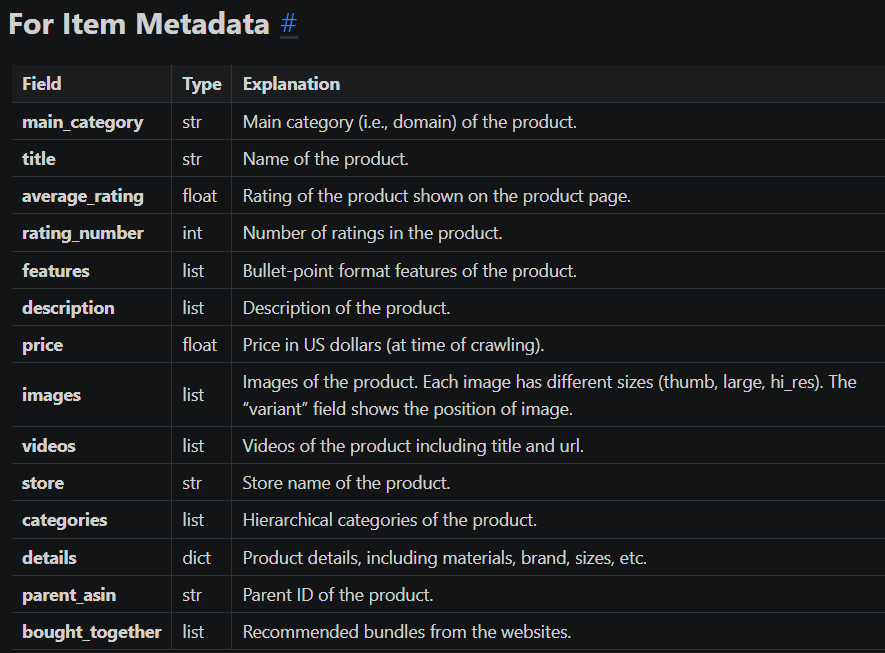

In [10]:
df.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880181 entries, 0 to 4880180
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   rating             int64 
 1   title              object
 2   text               object
 3   images             object
 4   asin               object
 5   parent_asin        object
 6   user_id            object
 7   timestamp          object
 8   helpful_vote       int64 
 9   verified_purchase  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 339.7+ MB


In [12]:
df.drop_duplicates(inplace=True)
df.drop('images', axis=1, inplace=True)

In [13]:
df.isnull().sum()

rating                  0
title                1899
text                 1896
asin                    0
parent_asin             0
user_id                 0
timestamp               0
helpful_vote            0
verified_purchase       0
dtype: int64

In [14]:
meta_df.isnull().sum()

main_category       1769
title                  0
average_rating        25
rating_number       2959
features               0
description            0
price              18266
images                 0
videos                 0
store                222
categories             0
details                0
parent_asin            0
bought_together    89251
subtitle           89251
author             89251
dtype: int64

In [15]:
meta_df.shape

(89251, 16)

In [17]:
cols_to_drop = ['subtitle','bought_together','author']
meta_df.drop(cols_to_drop, axis=1, inplace=True)

In [18]:
meta_df.isnull().sum()

main_category      1769
title                 0
average_rating       25
rating_number      2959
features              0
description           0
price             18266
images                0
videos                0
store               222
categories            0
details               0
parent_asin           0
dtype: int64

In [19]:
meta_df['parent_asin'].nunique()

89251

`parent_asin is unique in meta_df. 89251 products.`

In [21]:
cols_to_drop = ['images','videos']
meta_df.drop(cols_to_drop, axis=1, inplace=True)

In [22]:
meta_df.head(1)

,main_category,title,average_rating,rating_number,features,description,price,store,categories,details,parent_asin
0,Appstore for Android,Accupressure Guide,3.6,NaN,['All the pressing point has been explained wi...,"[""Acupressure technique is very ancient and ve...",0.0,mAppsguru,[],"{'Release Date': '2015', 'Date first listed on...",B00VRPSGEO


In [23]:
meta_df.drop('categories', axis=1, inplace=True)
meta_df.head(1)

,main_category,title,average_rating,rating_number,features,description,price,store,details,parent_asin
0,Appstore for Android,Accupressure Guide,3.6,NaN,['All the pressing point has been explained wi...,"[""Acupressure technique is very ancient and ve...",0.0,mAppsguru,"{'Release Date': '2015', 'Date first listed on...",B00VRPSGEO


In [29]:
# No of unique values in each column
print('Column \t Unique count \t Null percentage')
for column in df.columns:
  # print column, unique count and null percentage
  print('{} \t {} \t {}'.format(column,df[column].nunique(),df[column].isnull().sum()*100/df.shape[0]))

Column 	 Unique count 	 Null percentage
rating 	 5 	 0.0
title 	 1833957 	 0.03932390222326037
text 	 4077029 	 0.039261779154977174
asin 	 90359 	 0.0
parent_asin 	 89246 	 0.0
user_id 	 2589466 	 0.0
timestamp 	 4786221 	 0.0
helpful_vote 	 1535 	 0.0
verified_purchase 	 2 	 0.0


In [30]:
df.head(1)

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1,malware,mcaffee IS malware,B07BFS3G7P,B0BQSK9QCF,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2019-07-03 19:37:12.076,0,False


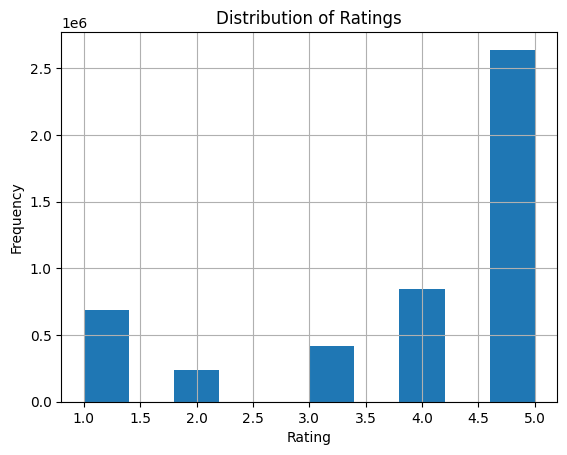

In [26]:
# Plot the distribution of rating
df['rating'].hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [24]:
df.shape

(4829124, 9)

In [ ]:
selected_cols = ['text','rating']
temp_df = df[selected_cols]
temp_df.head()

,text,rating
0,mcaffee IS malware,1
1,I love playing tapped out because it is fun to...,5
2,I love this flashlight app! It really illumin...,5
3,One of my favorite games,4
4,Cute game. I am not that good at it but my kid...,4


In [ ]:
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

In [ ]:
def preprocess_text(text):
    if isinstance(text, str): # Check if the text is a string
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = text.strip()
        return text
    else:
        return "" # Return an empty string if it's not a string

temp_df['cleaned_text'] = temp_df['text'].apply(preprocess_text)

<ipython-input-24-b3c435a459be>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cleaned_text'] = temp_df['text'].apply(preprocess_text)


In [ ]:
temp_df.head()

,text,rating,cleaned_text
0,mcaffee IS malware,1,mcaffee is malware
1,I love playing tapped out because it is fun to...,5,i love playing tapped out because it is fun to...
2,I love this flashlight app! It really illumin...,5,i love this flashlight app it really illumina...
3,One of my favorite games,4,one of my favorite games
4,Cute game. I am not that good at it but my kid...,4,cute game i am not that good at it but my kids...


In [ ]:
temp_df.isnull().sum()

text            1896
rating             0
cleaned_text       0
dtype: int64

In [ ]:
# Drop text column
temp_df_ready = temp_df
temp_df_ready.drop('text', axis=1, inplace=True)
temp_df_ready.head()

<ipython-input-27-45fb67a0978d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df_ready.drop('text', axis=1, inplace=True)


,rating,cleaned_text
0,1,mcaffee is malware
1,5,i love playing tapped out because it is fun to...
2,5,i love this flashlight app it really illumina...
3,4,one of my favorite games
4,4,cute game i am not that good at it but my kids...


# Sentiment Analysis Using VADER<br>
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [ ]:
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

temp_df_ready['vader_sentiment'] = temp_df_ready['cleaned_text'].apply(get_vader_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-29-d6d3a5e866d6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df_ready['vader_sentiment'] = temp_df_ready['cleaned_text'].apply(get_vader_sentiment)
